In [1]:
import matplotlib.pyplot as plt
import mindspore
from mindspore import Tensor
from mindspore import context
from mindspore.ops import operations as P
import mindspore.numpy as NP
import numpy as np
import pandas as pd
import difflib as dl
import random
import operator
import seaborn as sns
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

In [2]:
context.set_context(mode=context.PYNATIVE_MODE, device_target="CPU")

In [3]:
df = pd.read_csv("car_price.csv")
#display(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
CarBrand = df['CarName'].str.split(expand=True)[0]
set(CarBrand)
CarBrandProduct = df['CarName']

In [6]:
TrainColumn = df.columns.drop(['car_ID', 'symboling', 'CarName'])
Train = df[TrainColumn]
CategoryColumn = Train.select_dtypes(include = 'object').columns
pd.set_option('mode.chained_assignment', None)

print('before：')
for i in CategoryColumn:
    print(i)
    print(set(Train[i]))
    
#Encoding the string tyep feature
for i in CategoryColumn:
    Train[i] = LabelEncoder().fit_transform(Train[i])
    
print('after：')
for i in CategoryColumn:
    print(i)
    print(set(Train[i]))

before：
fueltype
{'diesel', 'gas'}
aspiration
{'turbo', 'std'}
doornumber
{'two', 'four'}
carbody
{'convertible', 'hatchback', 'hardtop', 'wagon', 'sedan'}
drivewheel
{'4wd', 'rwd', 'fwd'}
enginelocation
{'rear', 'front'}
enginetype
{'rotor', 'ohcf', 'ohcv', 'dohc', 'dohcv', 'l', 'ohc'}
cylindernumber
{'three', 'eight', 'twelve', 'two', 'five', 'six', 'four'}
fuelsystem
{'1bbl', '4bbl', 'idi', 'spfi', 'mfi', 'mpfi', 'spdi', '2bbl'}
after：
fueltype
{0, 1}
aspiration
{0, 1}
doornumber
{0, 1}
carbody
{0, 1, 2, 3, 4}
drivewheel
{0, 1, 2}
enginelocation
{0, 1}
enginetype
{0, 1, 2, 3, 4, 5, 6}
cylindernumber
{0, 1, 2, 3, 4, 5, 6}
fuelsystem
{0, 1, 2, 3, 4, 5, 6, 7}


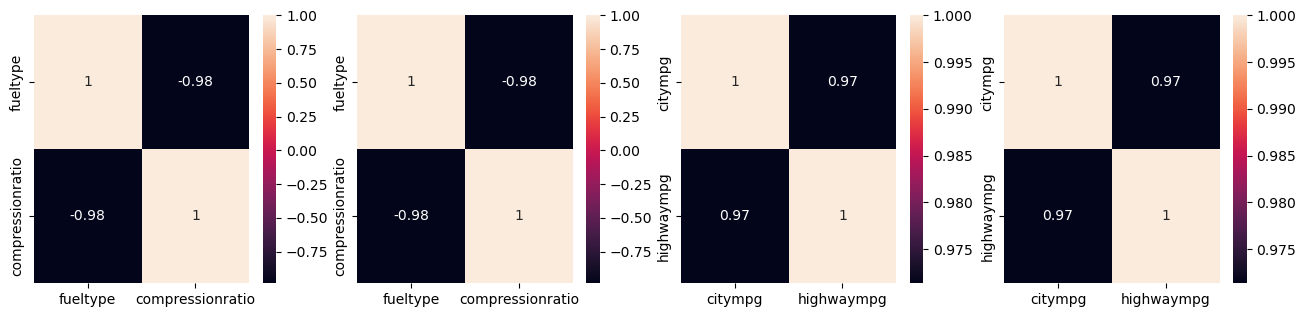

In [7]:
plt.figure(figsize=(16,16))
Threshold = 0.95
i=1
Cor = Train.corr()
for j in Train.columns:
    HighCor = Cor.index[abs(Cor[j]) > Threshold]
    if len(HighCor) > 1:
        Axis = plt.subplot(4,4,i)
        Axis = sns.heatmap(Train[HighCor].corr(), annot=True)
        i += 1
plt.show()

In [8]:
print('before：\n', Train.columns)
Train = Train.drop(['compressionratio', 'highwaympg'],axis=1)
print('after：\n', Train.columns)

before：
 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')
after：
 Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'horsepower', 'peakrpm', 'citympg',
       'price'],
      dtype='object')


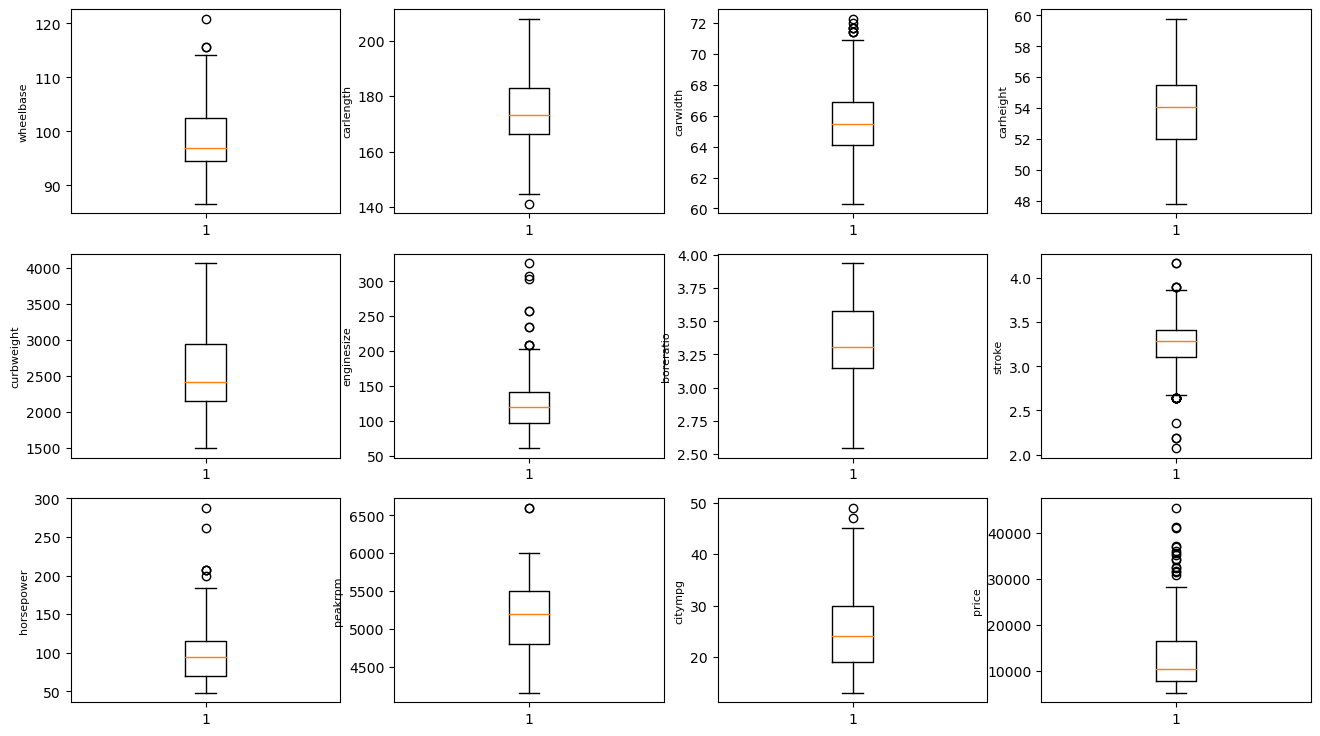

In [9]:
plt.figure(figsize=(16, 9))
BoxColumn = ['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke', 
             'horsepower', 'peakrpm', 'citympg', 'price']
i = 1
for j in BoxColumn:
    plt.subplot(3, 4, i)
    p = plt.boxplot(Train[j].values)
    plt.ylabel(j,fontsize=8) 
    i += 1

In [10]:
Scaler = MinMaxScaler()
Train = Scaler.fit_transform(Train.astype(float))
print('normalize\n', Train)

print(Train.shape)

normalize
 [[1.         0.         1.         ... 0.34693878 0.22222222 0.20795889]
 [1.         0.         1.         ... 0.34693878 0.22222222 0.28255797]
 [1.         0.         1.         ... 0.34693878 0.16666667 0.28255797]
 ...
 [1.         0.         0.         ... 0.55102041 0.13888889 0.40631051]
 [0.         1.         0.         ... 0.26530612 0.36111111 0.43076312]
 [1.         1.         0.         ... 0.51020408 0.16666667 0.43461099]]
(205, 21)


In [11]:
# PCA
Pca = PCA(n_components=0.9)
TrainPca = Pca.fit_transform(Train[:,0:-1])
TrainPca = pd.DataFrame(TrainPca)
TrainPca

,0,1,2,3,4,5,6,7,8
0,-0.650152,0.619117,-0.188212,0.135919,-0.335282,0.178319,0.337371,0.568771,-0.077839
1,-0.650152,0.619117,-0.188212,0.135919,-0.335282,0.178319,0.337371,0.568771,-0.077839
2,-0.460554,0.532970,-0.219655,0.120570,-0.073448,-0.079717,0.092503,-0.345980,0.076257
3,0.247112,-0.313913,-0.252831,-0.239347,-0.061064,0.130925,0.221594,-0.151716,0.048818
4,0.271510,-0.368890,-0.215304,-0.446355,0.352229,0.123620,0.362522,-0.191335,0.221746
...,...,...,...,...,...,...,...,...,...
200,0.637877,0.101363,-0.508840,0.065197,-0.099280,0.049426,-0.070055,0.023059,-0.106855
201,0.938017,0.477063,0.175041,-0.414494,-0.177006,-0.091682,-0.294632,0.150316,-0.112373
202,0.629929,0.150816,-0.589637,0.013688,-0.063937,-0.234178,-0.101053,-0.222234,-0.155011
203,1.001725,0.200196,0.848500,0.370403,-0.302922,-0.081771,-0.110242,-0.256572,0.102814


In [12]:
TrainPca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       205 non-null    float64
 1   1       205 non-null    float64
 2   2       205 non-null    float64
 3   3       205 non-null    float64
 4   4       205 non-null    float64
 5   5       205 non-null    float64
 6   6       205 non-null    float64
 7   7       205 non-null    float64
 8   8       205 non-null    float64
dtypes: float64(9)
memory usage: 14.5 KB


In [13]:
TrainPca.head()

,0,1,2,3,4,5,6,7,8
0,-0.650152,0.619117,-0.188212,0.135919,-0.335282,0.178319,0.337371,0.568771,-0.077839
1,-0.650152,0.619117,-0.188212,0.135919,-0.335282,0.178319,0.337371,0.568771,-0.077839
2,-0.460554,0.532970,-0.219655,0.120570,-0.073448,-0.079717,0.092503,-0.345980,0.076257
3,0.247112,-0.313913,-0.252831,-0.239347,-0.061064,0.130925,0.221594,-0.151716,0.048818
4,0.271510,-0.368890,-0.215304,-0.446355,0.352229,0.123620,0.362522,-0.191335,0.221746


In [14]:
def compute_squared_EDM(X):
    return squareform(pdist(X,metric='euclidean'))
def updateSeeds(seeds,core_PointId,neighbours,core_dists,reach_dists,disMat,isProcess):
    # Get the core distance of the core point core_PointId
    core_dist=core_dists[core_PointId]
    # Iterate over each neighbor point of core_PointId
    for neighbour in neighbours:
        # If the neighbour has not been processed, calculate this core distance
        if(isProcess[neighbour]==-1):
            # First calculate the reachable distance to core_PointId for the change point
            new_reach_dist = max(core_dist, disMat[core_PointId][neighbour])
            # If the reachable distance has not been calculated, assign the calculated reachable distance to
            if(np.isnan(reach_dists[neighbour])):
                reach_dists[neighbour]=new_reach_dist
                seeds[neighbour] = new_reach_dist
            # If the reachable distance has already been calculated, read whether to modify it
            elif(new_reach_dist<reach_dists[neighbour]):
                reach_dists[neighbour] = new_reach_dist
                seeds[neighbour] = new_reach_dist
    return seeds

def OPTICS(data,eps=np.inf,minPts=15):
    # Obtain the distance matrix
    orders = []
    disMat = compute_squared_EDM(data)
    # Get the rows and columns of the data (there are n data in total)
    n, m = data.shape
    # np.argsort(disMat)[:,minPts-1] Row sort by distance Find the index of the minPts element
    # disMat[np.range(0,n),np.argsort(disMat)[:,minPts-1]] Calculate the distance of the index of each element of minPts
    temp_core_distances = disMat[np.arange(0,n),np.argsort(disMat)[:,minPts-1]]
    # Calculate core distance
    core_dists = np.where(temp_core_distances <= eps, temp_core_distances, -1)
    # Undefined the reachable distance of each point
    reach_dists= np.full((n,), np.nan)
    # The number less than minPts in the matrix is assigned to 1, and the number greater than minPts is assigned to zero, then 1 represents the sum of each row, and then the index of the core point coordinates is found
    core_points_index = np.where(np.sum(np.where(disMat <= eps, 1, 0), axis=1) >= minPts)[0]
    # Used to identify if it is being processed, not processed, set to -1
    isProcess = np.full((n,), -1)
    # Iterate through all core points
    for pointId in core_points_index:
        # If the core point is not classified, use it as the seed point to start finding the corresponding cluster set
        if (isProcess[pointId] == -1):
            # Mark the point pointId as the current category (i.e. identify it as operated)
            isProcess[pointId] = 1
            orders.append(pointId)
            # Find the eps neighbors of the seed points that are not classified and put them into the seed set
            neighbours = np.where((disMat[:, pointId] <= eps) & (disMat[:, pointId] > 0) & (isProcess == -1))[0]
            seeds = dict()
            seeds=updateSeeds(seeds,pointId,neighbours,core_dists,reach_dists,disMat,isProcess)
            while len(seeds)>0:
                nextId = sorted(seeds.items(), key=operator.itemgetter(1))[0][0]
                del seeds[nextId]
                isProcess[nextId] = 1
                orders.append(nextId)
                # Find newPoint seed point eps neighborhood (contains itself)
                # The constraint isProcess == -1 is not added here because if it is, what would have been a core point may become a non-and core point
                queryResults = np.where(disMat[:, nextId] <= eps)[0]
                if len(queryResults) >= minPts:
                    seeds=updateSeeds(seeds,nextId,queryResults,core_dists,reach_dists,disMat,isProcess)
                # Cluster growth is complete and a category is found
    # Returns the reachable list in the dataset, and its reachable distance
    return orders,reach_dists
def extract_dbscan(data,orders, reach_dists, eps):
    # Get the rows and columns of the original data
    n,m=data.shape
    # reach_dists[orders] takes the reachable distances of each point and sorts them in an ordered list (i.e. output order)
    # np.where(reach_dists[orders] <= eps)[0], find the index of the point in the ordered list that is less than eps, i.e. the index of the corresponding ordered list
    reach_distIds=np.where(reach_dists[orders] <= eps)[0]
    # Normally: the value of current should have one more index than the value of pre. If it is greater than one index, it is not a category
    pre=reach_distIds[0]-1
    clusterId=0
    labels=np.full((n,),-1)
    for current in reach_distIds:
        # Normally: the value of current should have one more index than the value of pre. If it is greater than one index, it is not a category
        if(current-pre!=1):
            # Category+1
            clusterId=clusterId+1
        labels[orders[current]]=clusterId
        pre=current
    return labels

In [15]:
orders, reach_dists= OPTICS(TrainPca, np.inf, 3)
Predict=extract_dbscan(TrainPca,orders,reach_dists,0.5)
# print(reach_dists)
# print(labels)

In [16]:
CarOPTICS = df.copy()
CarCluster = pd.concat([CarOPTICS, pd.DataFrame(Predict)], axis=1)
CarCluster.rename({0:'Class'}, axis=1, inplace=True)
CarCluster.iloc[:, 20:].sample(10)

,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Class
40,9.0,86,5800,27,33,10295.0,3
204,9.5,114,5400,19,25,22625.0,6
35,9.2,76,6000,30,34,7295.0,3
80,7.5,116,5500,23,30,9959.0,9
13,9.0,121,4250,21,28,21105.0,4
16,8.0,182,5400,16,22,41315.0,-1
152,9.0,62,4800,31,38,6488.0,3
168,9.3,116,4800,24,30,9639.0,0
73,8.0,184,4500,14,16,40960.0,4
141,9.5,82,4800,32,37,7126.0,3


In [17]:
# Extracts from volkswagen brand models
CompPro = CarCluster.copy()
CompPro['Product'] = CarBrandProduct
#display(CompPro)
dumptest = CompPro.loc[CompPro['CarName'].str.contains("volkswagen")]
#display(dumptest)
VWCluster = set(dumptest['Class'])
print('Volkswagen brand products correspond to the category: ', VWCluster, '\n')

# Extract the competitor models of volkswagen brand
CompVW = CompPro.loc[CompPro['CarName'].str.contains("volkswagen")]
CompOther = CompPro.loc[CompPro['CarName'].str.contains("volkswagen") == False]
for i in VWCluster:
    print('The Volkswagen brand\'s category ' + str(i) + 'contains the following models:\n', set(CompVW[CompVW['Class'] == i]['Product'])), '\n'
    print('The competing models in the category ' + str(i) + 'of the Volkswagen brand are\n', set(CompOther[CompOther['Class'] == i]['Product']), '\n')

Volkswagen brand products correspond to the category:  {0, 4, 5, 7, -1} 

The Volkswagen brand's category 0contains the following models:
 {'volkswagen 1131 deluxe sedan'}
The competing models in the category 0of the Volkswagen brand are
 {'bmw 320i', 'saab 99e', 'nissan clipper', 'porsche macan', 'toyota corolla', 'isuzu D-Max ', 'bmw x1', 'toyota tercel', 'renault 5 gtl', 'nissan teana', 'vw rabbit', 'alfa-romero Quadrifoglio', 'porcshce panamera', 'saab 99le', 'audi fox', 'toyota starlet', 'porsche cayenne', 'vw dasher', 'porsche boxter', 'toyota corona liftback'} 

The Volkswagen brand's category 4contains the following models:
 {'volkswagen rabbit', 'volkswagen type 3', 'volkswagen 411 (sw)', 'volkswagen dasher'}
The competing models in the category 4of the Volkswagen brand are
 {'audi 100 ls', 'bmw 320i', 'volvo 245', 'volvo 145e (sw)', 'honda civic', 'nissan fuga', 'toyota corolla', 'mazda glc', 'volvo 244dl', 'bmw x3', 'audi 100ls', 'renault 12tl', 'peugeot 504', 'subaru tribec